# Caminatas aleatorias

Uno de los procesos estocásticos más fundamentales e importantes en la física es el *movimiento Browniano*. Un acercamiento inicial a este p|roblema se da a través de las *caminatas aleatorias*, que modela una partícula que recibe impactos al azar, que hacen que brinque en direcciones aleatorias.

[1] Piensa en una caminata aleatoria en una dimensión. Vive en los enteros, y en cada paso de tiempo brinca a la derecha con probabilidad $\frac{1}{2}$ y a la izquierda con probabilidad $\frac{1}{2}$.

Escribe una función que genere el tamaño del brinco: $+1$ o $-1$, cada uno con probabilidad $\frac{1}{2}$.

[2] Haz una función que calcule la trayectoria de una caminata aleatoria que empiece en $0$ y toma $n$ pasos al azar. Regresa la trayectoria.

(a) Dibuja varias trayectorias en una misma gráfica, como función del tiempo. ¿Qué observas?

(b) Dibuja *muchas* trayectorias en una misma gráfica. ¿Qué observas?

(c) Dibuja distintas curvas encima para intentar adivinar cómo se comporta la mancha en el tiempo.

(d) En lugar de dibujar muchas curvas, sólo dibuja los límites inferiores y superiores de la mancha. ¿Cómo cambian en el tiempo? Dibújalos de otra forma para verificar esto.

[3] Modifica tu función para que brinque a la derecha con probabilidad $p$ y a la izquierda con probabilidad $q := 1-p$. Para varios valores de $p$, dibuja varias trayectorias en una sola gráfica (una gráfica por valor de $p$). ¿Qué observas? 

[Puedes crear nuevas figuras en `PyPlot` con `figura()`.]

[4] Piensa en un tiempo final $n$ dado. ¿Cómo puedes caracterizar a la colección de posiciones de la colección de las posiciones de un número grande $M$ de caminantes aleatorios en este tiempo? Dibuja varias caracterizaciones como función del tiempo final $n$.

[5] Modifica tu caminante para que tenga una probabilidad $r$ de quedarse en el mismo lugar. ¿Cómo cambian los resultados?

[6] Haz lo mismo para caminantes en 2D y caminantes en 3D. [Aquí ya no dibujes las trayectorias como función del tiempo, sino dibuja las trayectorias en el espacio.]

In [2]:
function paso(p)
    Paso   = 0
    Random = rand()
    proba  = p/100.0
    if Random <= proba
        Paso = 1
        else
        Paso = -1
    end
    Paso
end

paso (generic function with 1 method)

In [3]:
paso(50)

-1

In [4]:
using PyPlot

INFO: Loading help data...


In [5]:
function caminata(pasos::Int64,proba,graph::Bool)
    Paso = zeros(pasos)
    for i in 1:pasos-1
        Paso[i+1] = Paso[i] + paso(proba)
    end
    if graph == true
        plot(Paso)
    end
        Paso
end

caminata (generic function with 1 method)

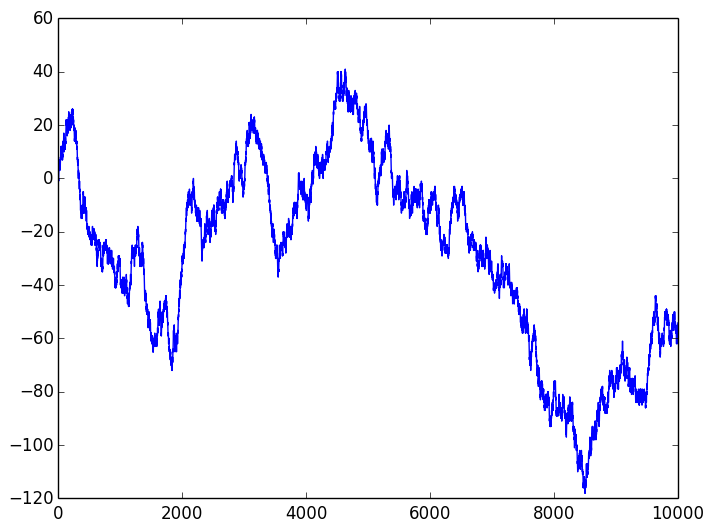

In [6]:
Caminata = caminata(10000,50,true);

In [7]:
function caminatas(pasos::Int64,proba,cuantas::Int64,graph::Bool)
    Caminatas = Any[]
    sizehint(Caminatas,cuantas)
    for i in 1:cuantas
        Caminatas = push!(Caminatas,caminata(pasos,proba,graph))
    end
    Caminatas
end

caminatas (generic function with 1 method)

In [8]:
function Pasos(cuantas::Int64,proba=50)
    step = int(zeros(cuantas))
    for i in 1:cuantas
        step[i]=paso(proba)
    end
    step
end     

Pasos (generic function with 2 methods)

In [9]:
function Metapasos(pasos::Int64,cuantas::Int64,proba=50)
    Caminatas = Any[]
    sizehint(Caminatas,pasos)
    for i in 1:pasos
        if i == 1 
            Caminatas = push!(Caminatas,Pasos(cuantas,proba))
        else
            Caminatas = push!(Caminatas,Pasos(cuantas,proba))
            Caminatas[i] += Caminatas[i-1]
        end
    end
    Caminatas
end    

Metapasos (generic function with 2 methods)

In [10]:
Pasos(3)

3-element Array{Int64,1}:
  1
 -1
  1

In [11]:
MP = Metapasos(100,200)

100-element Array{Any,1}:
 [1,1,-1,1,1,1,1,-1,-1,-1  …  -1,1,-1,-1,-1,-1,1,-1,-1,-1]            
 [2,2,0,2,0,0,0,-2,-2,-2  …  -2,0,0,-2,-2,0,0,0,0,-2]                 
 [1,3,-1,1,1,1,1,-3,-1,-3  …  -1,1,-1,-3,-3,-1,1,1,1,-1]              
 [2,2,-2,2,0,2,0,-4,0,-2  …  0,0,-2,-2,-2,0,0,0,0,0]                  
 [1,1,-1,1,-1,3,-1,-5,-1,-3  …  1,-1,-3,-1,-3,1,1,1,-1,1]             
 [0,0,0,0,-2,4,-2,-4,-2,-2  …  2,-2,-4,0,-4,2,2,2,0,0]                
 [-1,-1,-1,1,-1,3,-1,-3,-1,-1  …  3,-3,-5,-1,-5,3,1,3,-1,1]           
 [-2,0,-2,2,-2,4,-2,-2,0,0  …  2,-4,-6,-2,-6,4,2,4,0,2]               
 [-3,1,-1,3,-1,3,-3,-1,-1,-1  …  3,-5,-5,-1,-7,5,1,3,-1,3]            
 [-2,0,-2,2,-2,2,-4,-2,-2,-2  …  4,-4,-4,0,-8,6,0,2,0,2]              
 [-1,1,-3,1,-3,1,-3,-3,-3,-1  …  5,-3,-3,1,-7,5,1,3,-1,1]             
 [0,2,-4,2,-2,2,-2,-4,-4,0  …  6,-2,-4,0,-8,6,2,4,-2,0]               
 [1,3,-5,1,-3,1,-3,-5,-5,-1  …  5,-3,-5,-1,-7,5,1,5,-1,1]             
 ⋮                                                 

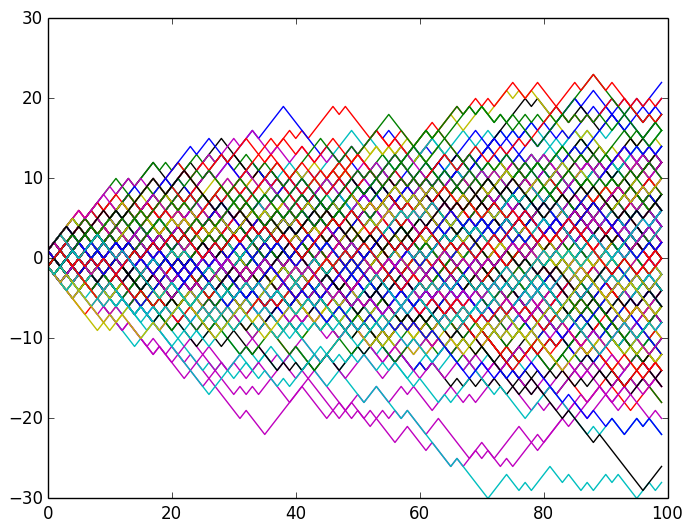

In [12]:
plot(MP);

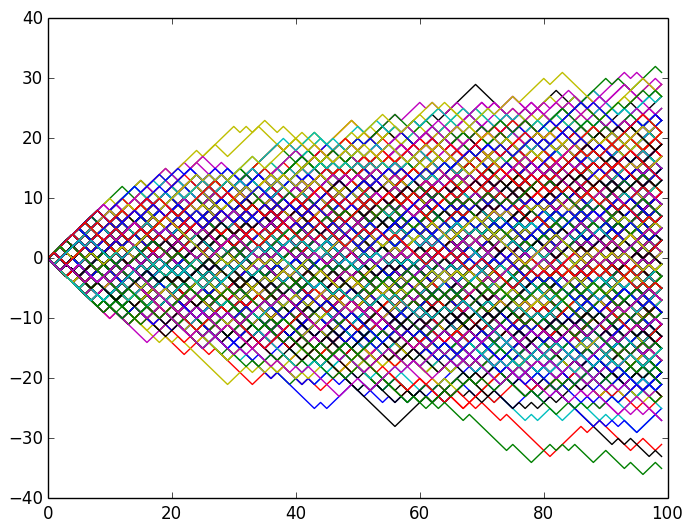

In [13]:
cm = caminatas(100,50,2000,true);


In [14]:
function mancha_ancho(t_max::Int64,cuantas::Int64,proba=50)
    Camin = Metapasos(t_max,cuantas,proba)
    diferencias = zeros(t_max)
    for i in 1:t_max
        diferencias[i] = maximum(Camin[i]) - minimum(Camin[i])
    end
    diferencias
end

mancha_ancho (generic function with 2 methods)

In [28]:
@time Mancha = mancha_ancho(5000,20000);

elapsed time: 4.737762371 seconds (2401421520 bytes allocated, 8.16% gc time)


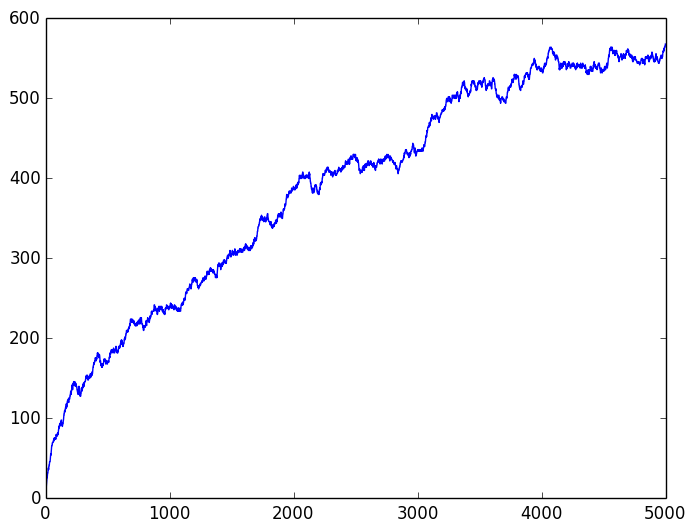

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x119ced650>

In [29]:
plot(Mancha)

In [17]:
# Cuenta de lugar final
function destino(pasos::Int64,cuantas::Int64,graph::Bool,proba=50)
    camis  = caminatas(pasos,proba,cuantas,false)
    ultimo = zeros(cuantas)
    #sizehint(ultimo,cuantas)
    
    for i in 1:cuantas
        #ultimo = push!(ultimo,camis[i][pasos])
        ultimo[i] = camis[i][pasos]
    end
    
    Min = minimum(ultimo)
    Max = maximum(ultimo)
    Size = int(Max-Min)
    Cnt = zeros(Size)
    #sizehint(Cnt,Size)
    for k in Min:Max
        #Cnt = push!(Cnt,count(x-> x==k,a))
        Cnt[k]=count(x-> x==k,a)
    end
    Cnt,ultimo
end

destino (generic function with 2 methods)